# Data understanding and Exploratory analysis (EDA)
## Topic: Examining the ecological processes influencing the assembly of molecules into OM assemblages


Dataset: 2 March 2022 from GDrive
(1) CF for SED and Water: https://drive.google.com/drive/folders/1hm4YNib_kI5Y4k7xp4E47w8qDjUIsagA?usp=sharing
(2) Metadata:

## Data Processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
fn_sed = "../Dataset/Sediment_Prevalence_10__commat_2021-09-29.csv"
fn_water = "../Dataset/Water_Prevalence_10__commat_2021-09-29.csv"
df_sed = pd.read_csv(fn_sed)
print('Sediment: ' + str(df_sed.shape))

df_water = pd.read_csv(fn_water)
print('Water: ' + str(df_water.shape))

# Data quality check
print(df_sed.columns.nunique())
print(df_water.columns.nunique())

# Check how many overlapping CF
print(len(set(df_sed.columns).intersection(set(df_water.columns))))

# Join datasets
df = pd.concat([df_sed, df_water], join="outer")
print(df.shape)

# Check if there is any identical columns / CF across all samples
print("Duplicated column: " + str(df.columns.duplicated().any()))

# Pre-processing
df = df.rename(columns={"Unnamed: 0": "sample_id"})
df = df.set_index("sample_id").fillna(0).reset_index()
df['type'] = df['sample_id'].str.split('_').str[0]
df['location'] = df['sample_id'].str.split('_').str[-2]
print(df.shape)
df.head()

Sediment: (239, 4053)
Water: (265, 4936)
4053
4936
2109
(504, 6880)
Duplicated column: False
(504, 6882)


,sample_id,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,...,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,type,location
0,SED_S19S.0001_D_Field,1,1.0,1,1.0,1,1,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,D
1,SED_S19S.0001_M_Field,1,1.0,1,1.0,1,1,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,M
2,SED_S19S.0001_U_Field,1,1.0,1,1.0,1,0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,U
3,SED_S19S.0003_D_Field,1,0.0,1,0.0,1,1,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,D
4,SED_S19S.0003_M_Field,1,0.0,0,0.0,0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,M


In [4]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['type','location']]).toarray())
encoder_df.columns = ['SED','SW','D','M','U']
#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df).set_index('sample_id')
final_df.drop(['type', 'location'], axis='columns', inplace=True)
final_df = final_df.apply(pd.to_numeric).astype(int)
final_df.head()

,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,C10H11O6N,...,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,SED,SW,D,M,U
sample_id,,,,,,,,,,,,,,,,,,,,,
SED_S19S.0001_D_Field,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
SED_S19S.0001_M_Field,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
SED_S19S.0001_U_Field,1,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
SED_S19S.0003_D_Field,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
SED_S19S.0003_M_Field,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [5]:
#final_df.to_csv('all.csv')

In [15]:
col = ['SED','SW','D','M','U']
final_df[col].value_counts()

SED  SW  D  M  U
0    1   0  0  1    265
1    0   0  1  0     83
            0  1     80
         1  0  0     76
dtype: int64

In [17]:
temp = final_df.groupby(col).sum().reset_index(drop=True).T
temp.head(5)

,0,1,2,3
C10H10O5,245,74,75,71
C10H10O5N4,0,60,63,53
C10H10O6,250,69,66,63
C10H10O6N4,0,42,41,40
C10H10O7,234,60,53,54


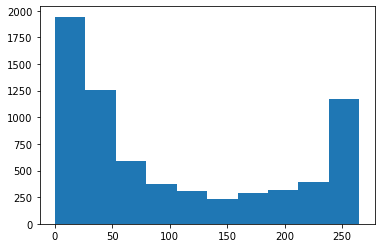

In [19]:
plt.hist(temp[0])
plt.show()

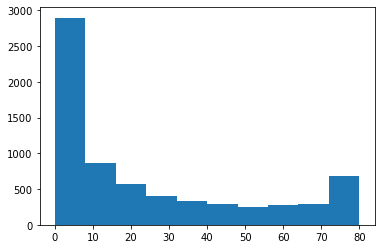

In [20]:
plt.hist(temp[1])
plt.show()

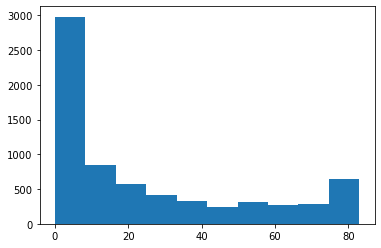

In [21]:
plt.hist(temp[2])
plt.show()

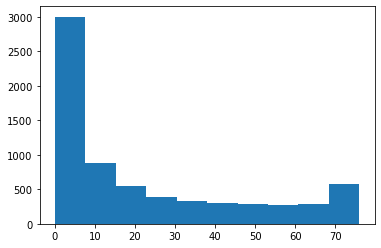

In [22]:
plt.hist(temp[3])
plt.show()

Questions to clarify before further analysis:
    
    (1) SED, SW, D, M, U (2 types, 3 locations = 6 categories) with CF? >> There are only four categories: SED_D, SED_M, SED_U and SW_U
    (2) Prior knowledge on CF for feature engineering e.g. common CF, rare CF etc. >> we do know the unique CF only in SED or SW only, we are interested in the overlap?
    (3) Data understanding from topic 1 slide: Core and satellite? 
    (4) Clustering: on metadata? on CF? Does it make sense to reduce the dimensions of CF using PCA? or can we engineer feature based on the CF? Expecting to find plant-based, microbial-based >> what data tell you this
    (5) Definition of clusters >> Unsupervised doesn't make sense if we already know the cluster is the categories
    (6) Need to clarify the research question: keywords of ecological processes, assembly of molecules, OM

## Clustering the samples based on reduced CF using Feature Agglomeration and k-means